# 3. Supervised Learning (learning with a teacher)

- the output is labelled (versus unsupervised where we don't know the label)
- Regression or classification
- Classification problems are when the target output can be classified:  male/female,  pass/fail,  cat/dog or cat/dog/tiger/bird
- Regression problems are when the output is continuous:  marks, temperature, stock market value etc, house price

input features: X
target feature: Y (what we want to predict)

unsupervised:  has no label;  has no Y (group similar things)

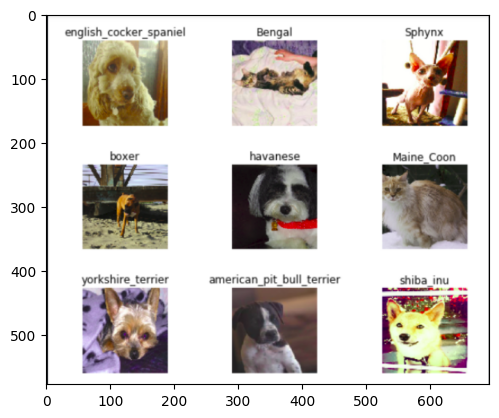

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Figures/label.png')
imgplot = plt.imshow(img)
plt.show()


# 3.2 Models

**Parametric** 
- linear regression, logistic regression, neural networks; 
- Train models by **tuning coefficients**
- Assume a form

**Non-parametric** 
- k nearest neighbors, decision trees (random forest), kmeans clustering etc. 
- Do not assume a form

In [54]:
import pandas as pd
df = pd.read_csv("Datasets/iris2.csv")

linear regression and logistic regression form the basis for neural networks

## 3.3 Linear regression (parametric model)

In my opinion, this is the bread and butter of machine learning.  If you understand linear regression, you can understand more complex models such as neural networks.  


- This is a linear parametric model of the form

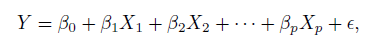

The beta coefficients are the parameters/coefficients we are trying to estimate and *Y* (target) and *X (X1, X2, ... Xp)* are the measured data.  A parametric model assumes the functional form to be linear (even if the true relationship is non-linear).




In [3]:
df.head()

A    B    C    D            Y
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

### Linear regression allows us to do two things:  

1. train/fit a model on data and then use it to make predictions **(PREDICTIONS)**
2. carry out inference by computing the parameters.  The parameters tell us how strong the relationship of that feature is with the output.  It is a measure of the correlation between X1 (say) and Y.  **(INFERENCE)**
  - interpretable;  why did the model make the predictions?

#### One dimensional example

Text(0, 0.5, 'Sales')

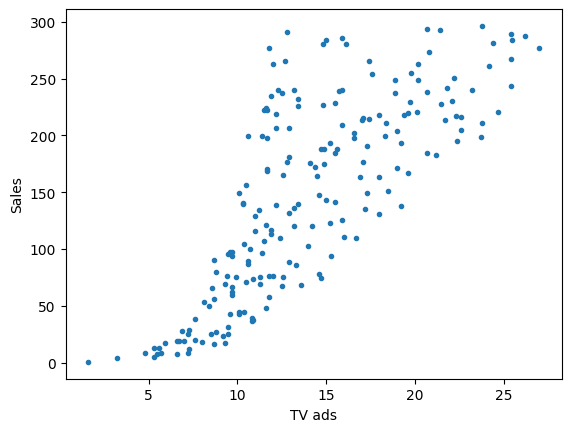

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

df_1d = pd.read_csv("Datasets/tvmarketing_1d_regression.csv")
plt.plot(df_1d["Sales"], df_1d["TV"], ".")
plt.xlabel("TV ads")
plt.ylabel("Sales")

In [6]:
df_1d

TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]

Simple linear regression:  what is the relationship between Sales and TV adverts?  Say we have data that shows Sales and TV advertising.

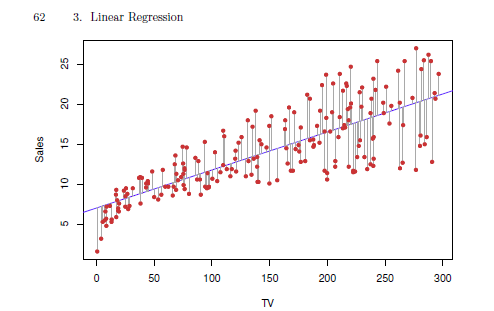

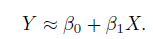

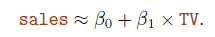

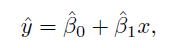

**B0** is the intercept term and **B1** is the slope of x

It is these that we want to estimate.   We estimate it by performing least squares.  We have our data (shown above) and we want to fit a line that minimizes the sum of distances between the actual data points and the line. 

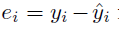

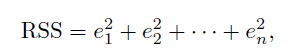

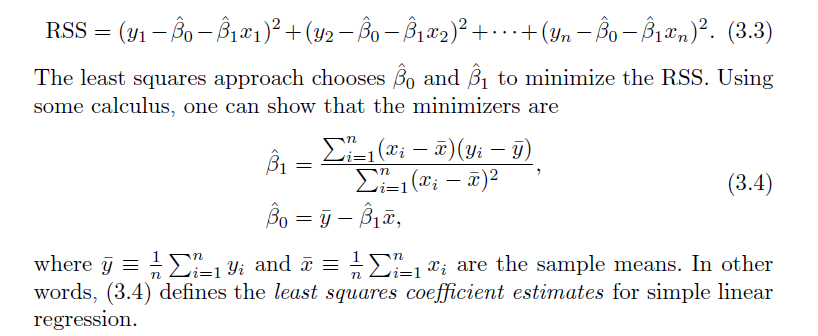

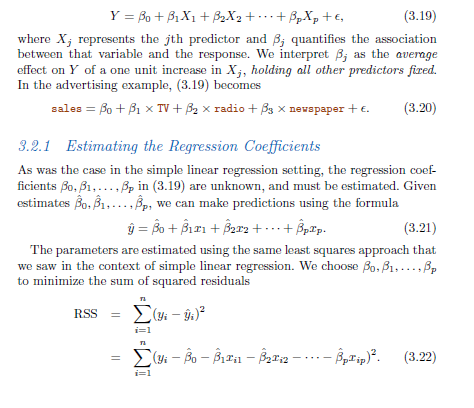

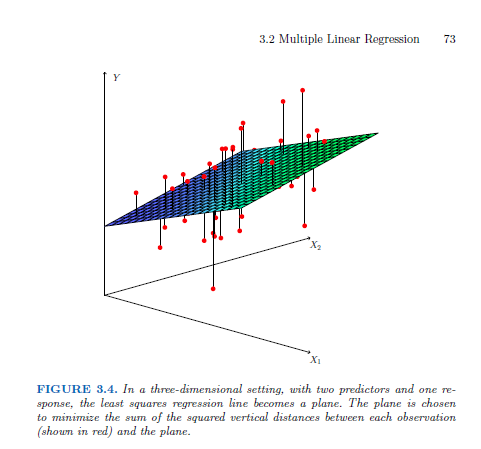

In [56]:
#split dataset into X and y using Pandas iloc

X = df_1d.iloc[:,0]
y = df_1d.iloc[:,1]

# convert to 2 d numpy array for training
X_r = np.array(X).reshape(-1,1)  # -1: as many rows as is needed;  1 column;  convert from (200,) to (200,1)
y_r = np.array(y).reshape(-1,1)

In [20]:
df_1d.shape

(200, 2)

Text(0, 0.5, 'Sales')

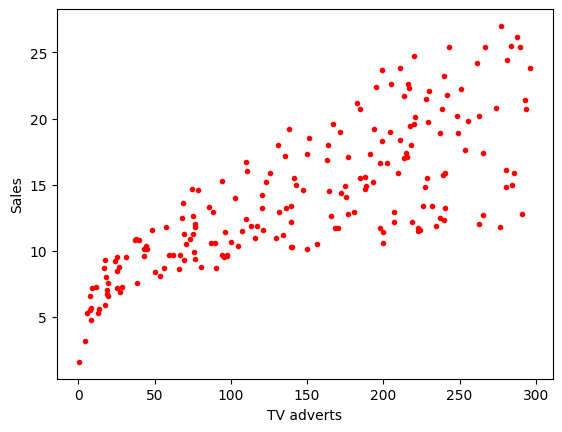

In [57]:
plt.plot(X,y,"r.")
plt.xlabel("TV adverts")
plt.ylabel("Sales")

In [80]:
y = b0 + b1*x

In [10]:
#instantiate the model
LR_model = LR()

In [ ]:
    # to train the model, use .fit(X,y)

In [11]:
LR_model.fit(X_r,y)

LinearRegression()

training and testing.

LR_model.score(y_pred, y_test)

y_pred - what your trained model predicts when you feed in y_test
y_test - actual test output/target data

In [23]:
LR_model.score(y_r,y_r)

-1.3834030782226838

In [12]:
print(LR_model.intercept_)  #b0
print(LR_model.coef_)  #b1

7.032593549127695
[0.04753664]


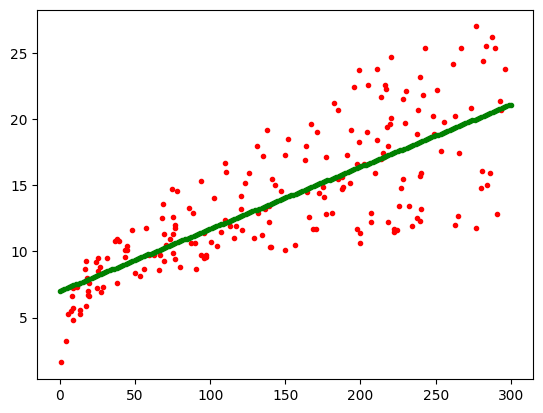

In [19]:
#create x inputs
inputs = np.linspace(0,300, num=200)

#PLAY AROUND WITH THE COEFS

b0 = 7
b1 = 0.047

y2 = b0 + b1*inputs

fig,ax = plt.subplots()
ax.plot(X,y,"r.")
ax.plot(inputs,y2,"g.")

In [ ]:
distance type model

## K Nearest Neighbors regression (non-parametric model)


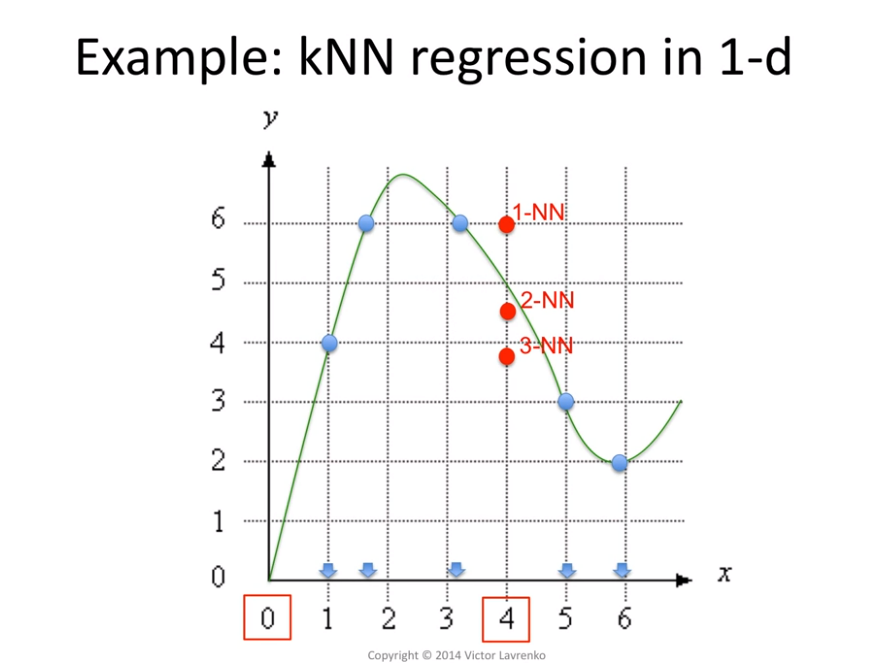

Select an input value, e.g. 4 and find the k nearest neighbors and average them.  At 4 with 1NN, we would have the same value as 3.2 -> 6;  with 2NN we average 6 and 3 to get 4.5;  with 3NN we average 6, 3, 2 to get about 3.7

There is a sweetspot or optimal number of nearest neighbors

The prediction formula for KNN Regression is:

$$ \hat{y}_{\text{new}} = \frac{1}{k} \sum_{i \in \mathcal{N}_{\text{new}}} y_i $$

where:
- $$ \hat{y}_{\text{new}} $$ is the predicted value for the new data point.
- $$ k $$ is the number of nearest neighbors.
- $$ \mathcal{N}_{\text{new}} $$ is the set of indices of the $$ k $$ nearest neighbors to the new data point.
- $$ y_i $$ are the target values of the $$ k $$ nearest neighbors.





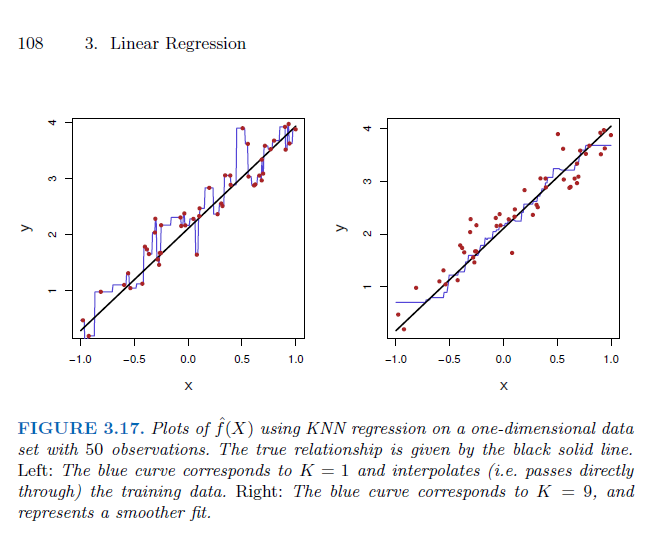

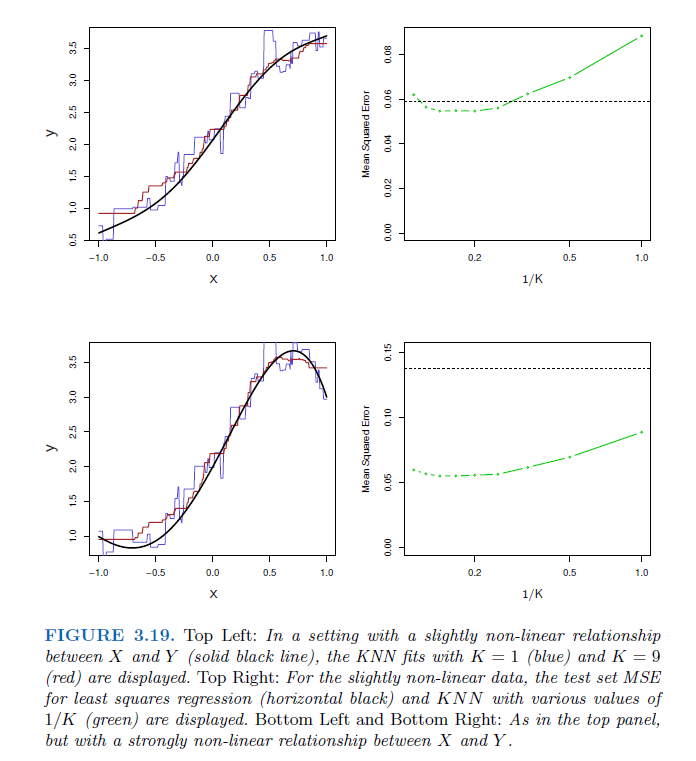

In [24]:
from sklearn.neighbors import KNeighborsRegressor as KNNReg

In [71]:
# instantiate the model
model_knnreg = KNNReg(n_neighbors=1)

#fit the model; train the model
model_knnreg.fit(X_r, y_r)

KNeighborsRegressor(n_neighbors=1)

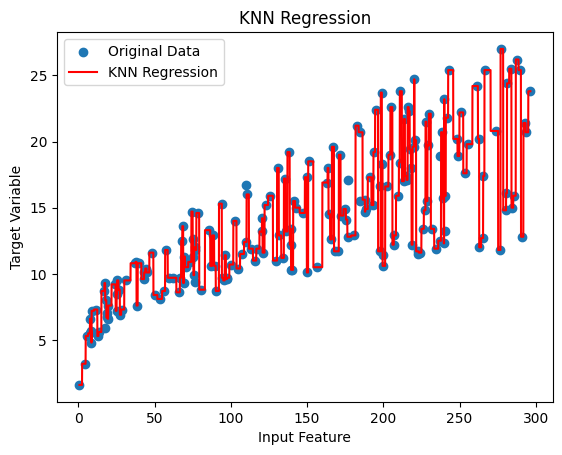

In [58]:
knn_reg = KNNReg(n_neighbors=1)
#sales as a function of tv adverts (X adverts, y sales)
knn_reg.fit(X_r, y)
# Generate predictions over the range of input data
x_range = np.linspace(np.min(X), np.max(X), 10000)
y_pred = knn_reg.predict(x_range.reshape(-1, 1))
# Plot the original dataset
plt.scatter(X, y, label='Original Data')
# Plot the regression line
plt.plot(x_range, y_pred, color='red', label='KNN Regression')
# Set labels and title
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.title('KNN Regression')
# Add a legend
plt.legend()
# Display the plot
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

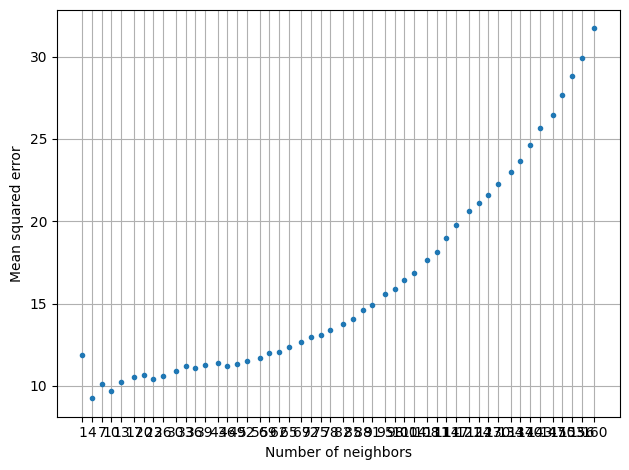

In [36]:
X_train1,X_test1, y_train1, y_test1 = train_test_split(X_r,y, test_size=0.2, random_state=42)

#start with a large range to see how the error changes as a function of n
# zoom into regions

num_points = 50
n_neighbors = np.linspace(1, 160, num=num_points, dtype=int)

test_errors =[]
for n in n_neighbors:
    knn_reg = KNNReg(n_neighbors=n)
    knn_reg.fit(X_train1, y_train1)
    y_pred = knn_reg.predict(X_test1)
    mse = mean_squared_error(y_test1,y_pred)
    test_errors.append(mse)
    
plt.plot(n_neighbors, test_errors,'.')

plt.xlabel("Number of neighbors")
plt.ylabel("Mean squared error")
plt.xticks(n_neighbors)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3.4 Classification models

# Logistic regression (parametric)
- bread and butter of ML
 - As with linear regression, logistic regression is also a building block for neural nets:  activation function (non-linear) 

Similar to linear regression, but is a non-linear classification model

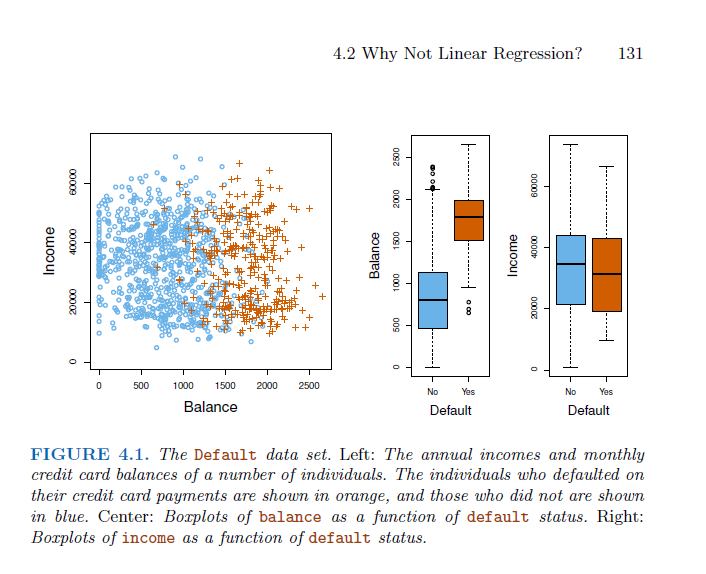

The probability that the output is a specific class, given the input value X

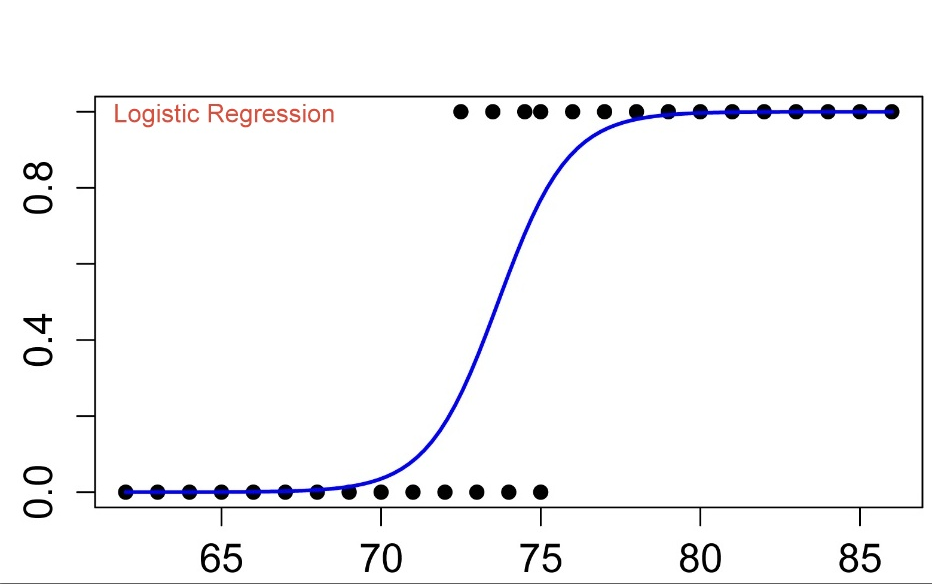

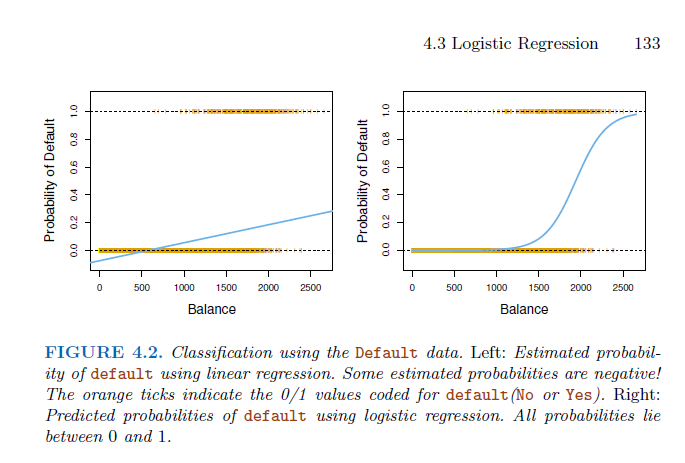

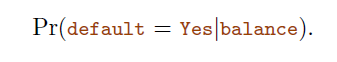

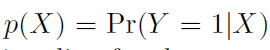

Instead of a linear model, modeling the response Y directly,
logistic regression models the probability that Y belongs to a category

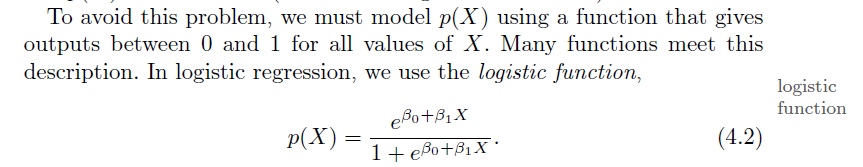

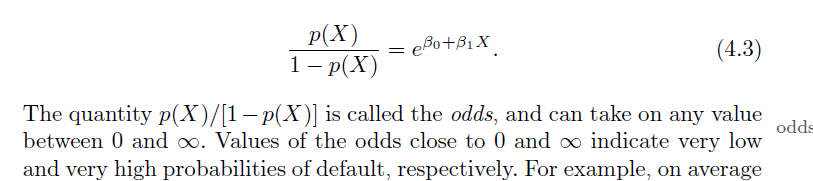

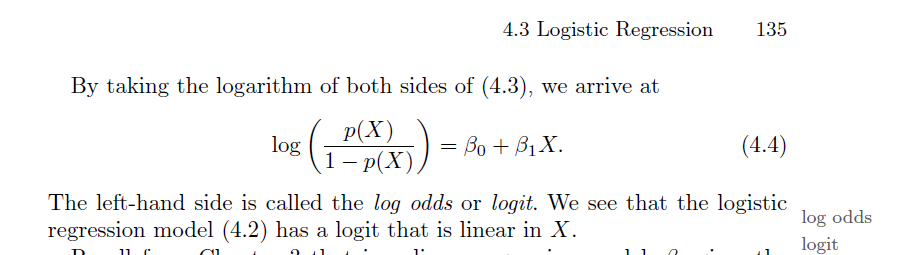

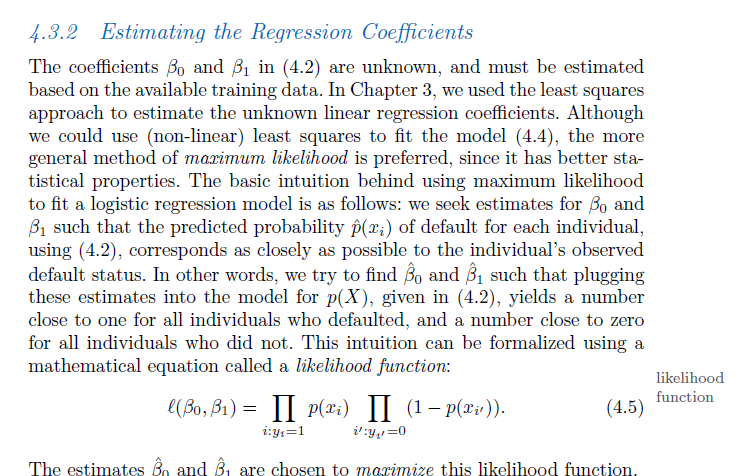

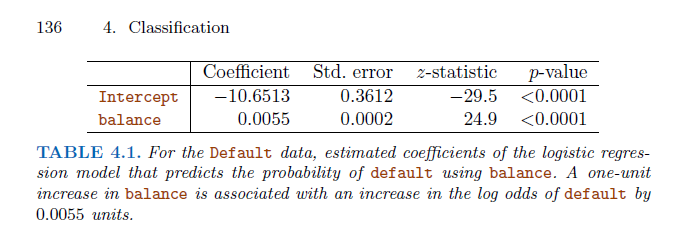

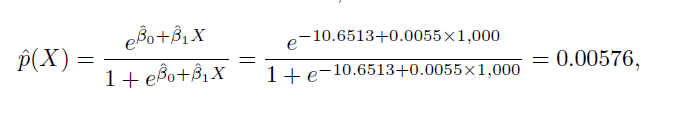

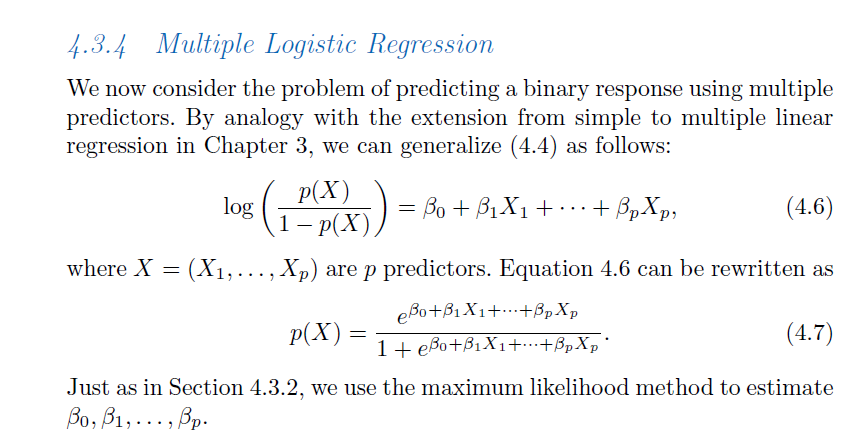

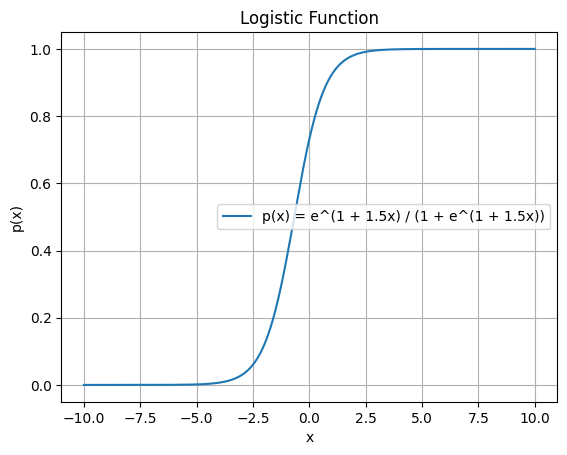

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def log_reg(x,b0,b1):
    return np.exp(b0+b1*x)/(1+np.exp(b0+b1*x))

x = np.linspace(-10,10, 1000)
b0 = 1
b1 =1.5

y = log_reg(x,b0,b1)

# Plot the logistic function
plt.plot(x, y, label=f'p(x) = e^({b0} + {b1}x) / (1 + e^({b0} + {b1}x))')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Logistic Function')
plt.legend()
plt.grid(True)
plt.show()

- linear regression (linear function, continuous output, find the beta coefficients that best fit the model) - betas
- knn regression (interpolate and find values that are based on the neighbors)
- logistic regression (actually a classifier - output is categorical/classes) - find coefficients that fit the model ;  probability model;  it gives a probability of some outcome, like passing/failing, default etc.

# KNN Classification

- Similar to KNN regression, we have a training set (see blue and orange dots), and we want to train a model to find a DECISION BOUNDARY.  
- Generate a large number of grid points and calculate the class based on k nearest neighbors; 

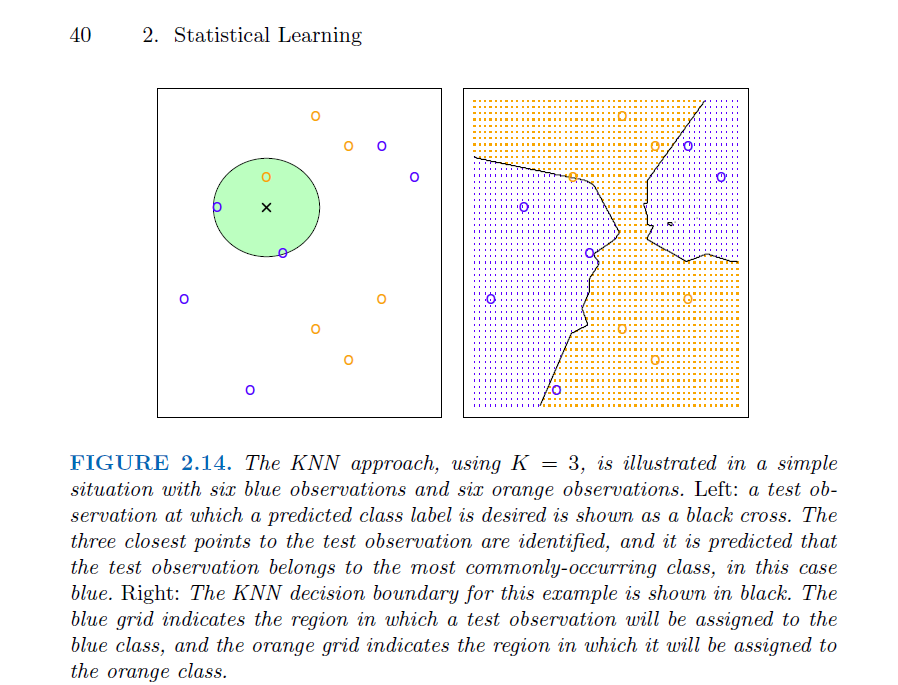

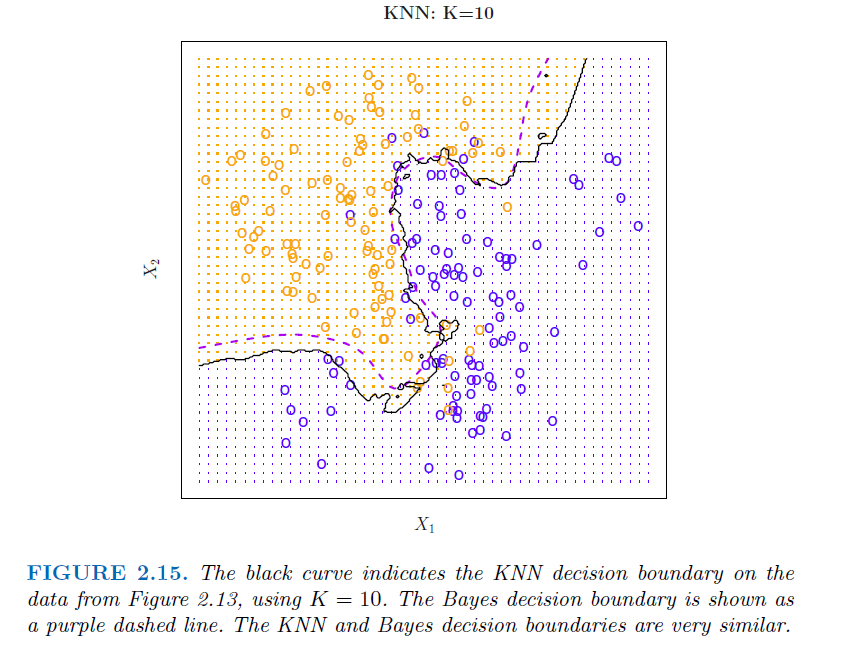

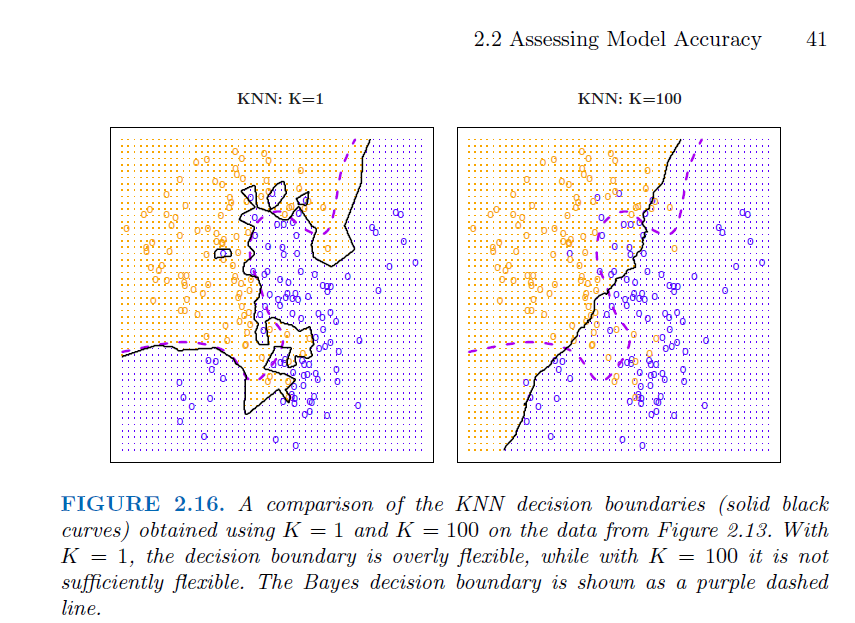

# Decision Trees/ Random Forest


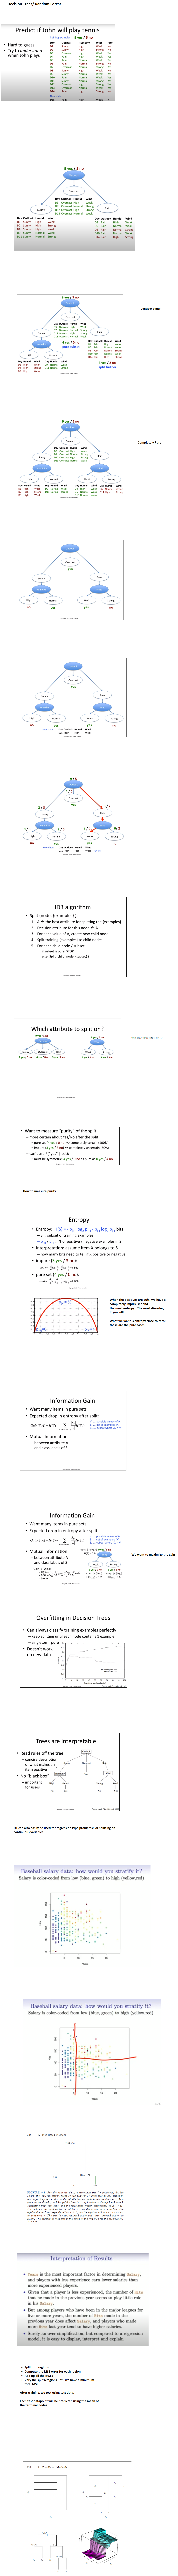

DT can also easily be used for regression type problems;  or splitting on continuous variables.

	• Split into regions
	• Compute the MSE error for each region
	• Add up all the MSEs
	• Vary the splits/regions until we have a minimum total MSE

After training, we test using test data.

Each test datapoint will be predicted using the mean of the terminal nodes

## random forest which is an ensemble of decision trees

### Why?  
- reduce overfitting
- reduces variance
- random forests are ensembles of learners which tend to perform better than individual models
- feature importances


### Bagging:   boostrap aggregating

- Take repeated samples from the training set and train a decision tree to each sample
- Make predictions using each tree and average (or majority vote) 


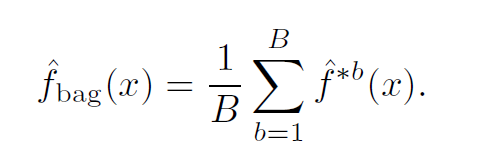


RF - take a further step by taking subsets of the predictors
- recall we have examples (instances) and predictors (p)
- Bagging takes repeated samples using all the predictors
- RF is bagging WITH using only a subset of the predictors (this decorrelates the trees)


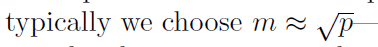

1. Preparing the data;  EDA, splitting, cleaning (missing, encoding, scaling, renaming columns, deleting, dropping)
2. Supervised learning (learn with a label);  regression (linear regression, knn regression, dt/rf) classification (logistic regression, knnregression, dt/rf)  
3. How do we evaluate the models?  

## Classification example

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# we need to convert data to numeric inputs
#one hot encoding

In [60]:
# import dataset
df = pd.read_csv("Datasets\\adult.csv")
df.columns

Index(['Age', 'work class', 'fnlwgt', 'Education', 'Educ_Num', 'Marital',
       'Occupation', 'Relationship', 'Race', 'Sec', 'Capital gain',
       'Capital loss', 'Hours per week', 'Country', 'Income'],
      dtype='object')

### Let's first prep the dataset as before

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["Income"])
y = df["Income"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [98]:
X_test.columns

Index(['Age', 'work class', 'fnlwgt', 'Education', 'Educ_Num', 'Marital',
       'Occupation', 'Relationship', 'Race', 'Sec', 'Capital gain',
       'Capital loss', 'Hours per week', 'Country'],
      dtype='object')

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#instantiate 
normal = StandardScaler()   # normalize with mean zero and std =1
scale =  MinMaxScaler()  #scale between 0 and 1

In [63]:
from sklearn.preprocessing import StandardScaler

# Assuming normal is your StandardScaler instance
normal = StandardScaler()

# Select numerical columns from X_train
numerical_columns = X_train.select_dtypes(include=['int', 'float']).columns

# Ensure X_test has the same numerical columns
#X_test = X_test[numerical_columns]

# Apply transformers to numerical columns
X_train[numerical_columns] = normal.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = normal.transform(X_test[numerical_columns])


In [20]:
X_test[numerical_columns]

Age    fnlwgt  Educ_Num  Capital gain  Capital loss  \
23159  1.490938 -1.490638  0.359535     -0.146712     -0.215167   
26692 -1.216606  0.389348  0.742977     -0.146712     -0.215167   
7076  -0.631191  0.866812  1.126418     -0.146712     -0.215167   
4086   0.832346 -0.140566 -1.557672     -0.146712     -0.215167   
21415 -0.265307  0.095101 -0.023906     -0.146712     -0.215167   
...         ...       ...       ...           ...           ...   
18583 -0.923898  0.654077  1.126418     -0.146712     -0.215167   
4120   1.125054  1.114543 -0.023906     -0.146712     -0.215167   
25837  2.515414 -0.158790  1.126418     -0.146712     -0.215167   
20940 -0.997075  2.661426 -0.023906     -0.146712     -0.215167   
18728  1.417761 -1.472347  1.126418     -0.146712     -0.215167   

       Hours per week  
23159       -0.360671  
26692       -1.646179  
7076        -0.039294  
4086         4.701019  
21415        1.567592  
...               ...  
18583       -0.039294  
4120        -0.039294  
25837       -2.047901  
20940       -0.039294  
18728        0.764149  

[16281 rows x 6 columns]

In [21]:
X_test.head()

Age         work class    fnlwgt      Education  Educ_Num  \
23159  1.490938            Private -1.490638      Assoc-voc  0.359535   
26692 -1.216606            Private  0.389348     Assoc-acdm  0.742977   
7076  -0.631191            Private  0.866812      Bachelors  1.126418   
4086   0.832346                  ? -0.140566           10th -1.557672   
21415 -0.265307   Self-emp-not-inc  0.095101   Some-college -0.023906   

                   Marital          Occupation    Relationship    Race  \
23159             Divorced      Prof-specialty   Not-in-family   White   
26692        Never-married   Handlers-cleaners       Own-child   Black   
7076         Never-married        Adm-clerical   Not-in-family   White   
4086    Married-civ-spouse                   ?         Husband   White   
21415   Married-civ-spouse       Other-service         Husband   White   

           Sec  Capital gain  Capital loss  Hours per week         Country  
23159   Female     -0.146712     -0.215167       -0.360671   United-States  
26692     Male     -0.146712     -0.215167       -1.646179         Jamaica  
7076    Female     -0.146712     -0.215167       -0.039294   United-States  
4086      Male     -0.146712     -0.215167        4.701019   United-States  
21415     Male     -0.146712     -0.215167        1.567592   United-States

In [56]:
X_train.head()

Age         work class    fnlwgt      Education  Educ_Num  \
5514  -0.408756          Local-gov  0.080051      Bachelors  1.133702   
19777 -0.188857            Private -0.981653      Assoc-voc  0.357049   
10781  1.423734   Self-emp-not-inc  0.126197            9th -1.972910   
32240 -1.288351            Private -0.090935      Assoc-voc  0.357049   
9876  -0.848554            Private  0.856334   Some-college -0.031277   

                   Marital        Occupation    Relationship    Race      Sec  \
5514         Never-married    Prof-specialty   Not-in-family   White   Female   
19777   Married-civ-spouse   Exec-managerial         Husband   White     Male   
10781            Separated      Craft-repair   Not-in-family   White     Male   
32240   Married-civ-spouse   Farming-fishing         Husband   White     Male   
9876              Divorced     Other-service   Not-in-family   White     Male   

       Capital gain  Capital loss  Hours per week         Country  
5514      -0.145715     -0.217998        0.779460   United-States  
19777     -0.145715      4.457168        0.779460   United-States  
10781     -0.145715     -0.217998       -0.031510   United-States  
32240     -0.145715     -0.217998        0.455072   United-States  
9876      -0.145715     -0.217998       -0.031510   United-States

In [64]:
# One hot encoding - use get_dummies()
X_train2 = pd.get_dummies(X_train.drop(columns = ['Country']))
X_test2 = pd.get_dummies(X_test.drop(columns = ['Country']))
X_test2.shape

(6513, 66)

In [86]:
X_train2.shape

(26048, 66)

In [65]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()


# Apply LabelEncoder to the 'income' column
y_train2 = pd.DataFrame(label_encoder.fit_transform(y_train))
y_test2 = pd.DataFrame(label_encoder.fit_transform(y_test))

In [9]:
## class frequencies

class_frequencies = pd.DataFrame(y_train).value_counts().values
class_proportions = pd.DataFrame(y_train).value_counts()/len(y_train)

# Print the results
print("Class Frequencies:")
print(class_frequencies)
print("\nClass Proportions:")
print(class_proportions)

Class Frequencies:
[12360  3920]

Class Proportions:
0    0.759214
1    0.240786
dtype: float64


In [66]:
# immediately apply classification models (even if we don't understand anything yet)

from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC

# instantiating the models
# actually within the brackets are many potential arguments that we could change (parameters).  But if we leave it open then
# it uses the default;  we will see how to change these hyperparameters later for tuning the "optimal" models.
LR = LogReg()
KNC = KNC(n_neighbors=3)
RFC = RFC()
GBC = GBC()


LR_model = LR.fit(X_train2, y_train2)
RFC.fit(X_train2, y_train2)
KNC.fit(X_train2, y_train2)
GBC.fit(X_train2, y_train2)


C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a0025105\AppData\Local\Temp\ipykernel_5300\1470912940.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

GradientBoostingClassifier()

#### What is the big idea?   Take a dataset, train a model on the data, then we can use the trained model on new data to make prediciton 

In [ ]:
linear regression, knn, random forest etc.

# 3.5 Evaluating Models

- So far we have only looked at how the models are trained. 
- But, how do we know one model is better than another?  If we are comparing different models such as LR, KNN, RF etc.
- How do we know that the model is optimal?  (i.e. based on the training/test data, how do we know we have trained the best possible model).  
 




### Evaluation metrics (measure the models)
- we evaluate/measure models using methods for regression or classification
- regression evaluation methods:  MSE, MAE, R2 etc.
- classification methods:  accuracy, precision, recall, AUC, confusion matrix etc.
- Generally good practice to evaluate models using a few evaluation methods





### Cross validation (evaluate on unseen data)
- train/val/test split
- k-fold cross validation

The above training is not good enough.  We need a way to evaluate how good our models are.  For this, we need a dataset that the model has NOT seen.  This is called a test set.  The most common way to do this is to take our existing dataset and split it into training and testing sets.  Then we train our model on the training set and then test it on the unseen test set.  This gives an indication of how well it will generalize to new data.  Although a better way is to perform k-fold CV.


hyperparameters (tuning)

X_train, y_train and X_test, y_test

Model(X_train, y_train) -> Model
Model(X_test) -> y_prediction

mse(y_test, y_prediction)

### Regression Evaluation Metrics

In machine learning, regression evaluation metrics are used to assess the performance of regression models, which predict continuous numerical values. Here are brief descriptions of some common regression evaluation metrics:

**Mean Squared Error (MSE)**: MSE measures the average squared difference between the predicted and actual values. It provides a measure of the model's overall accuracy, with higher values indicating larger errors.

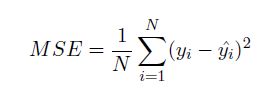

**Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE and provides an interpretable metric in the same units as the target variable. It is widely used to assess the average prediction error, with smaller values indicating better performance.



**Mean Absolute Error (MAE)**: MAE measures the average absolute difference between the predicted and actual values. It is less sensitive to outliers compared to MSE and provides a linear representation of the error magnitude.

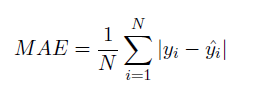

**R-squared (R²)**: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (target) explained by the independent variables (features). It ranges from 0 to 1, where 0 indicates the model explains none of the variance, and 1 indicates a perfect fit.

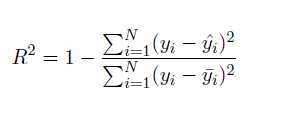

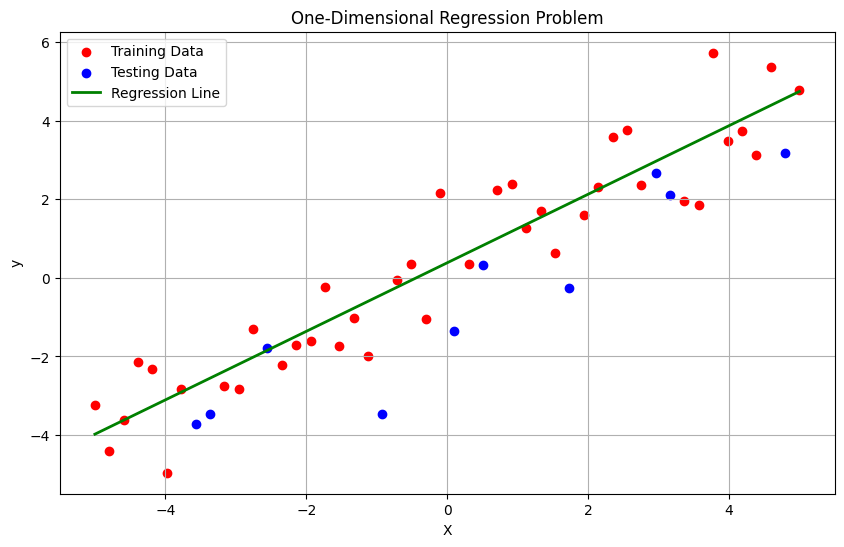

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(0)
X = np.linspace(-5, 5, 50).reshape(-1, 1)  # One-dimensional input (X)
y = X + np.random.normal(0, 1, size=X.shape)  # Linear relationship with noise

# Split data into training and testing sets
x_train, x_test, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)

# Fit a linear regression model
model = LinearRegression()
model.fit(x_train, y_train3)

# Predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(x_train, y_train3, color='red', label='Training Data')

# Plot testing data
plt.scatter(x_test, y_test3, color='blue', label='Testing Data')

# Plot regression line
plt.plot(X, model.predict(X), color='green', linewidth=2, label='Regression Line')

plt.title('One-Dimensional Regression Problem')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Classification Evaluation Metrics



#### Confusion matrix

1. train a model on data  (training data)
2. feed in new x (test data) and make a prediction:  y_pred
3. compare with true output:  y_true (test data)

- True positives (predict true and are true)
- True negatives (predict negative and are actually negative)
- False positives (predict positive, but are negative)
- False negatives (predict negative, but are positive)


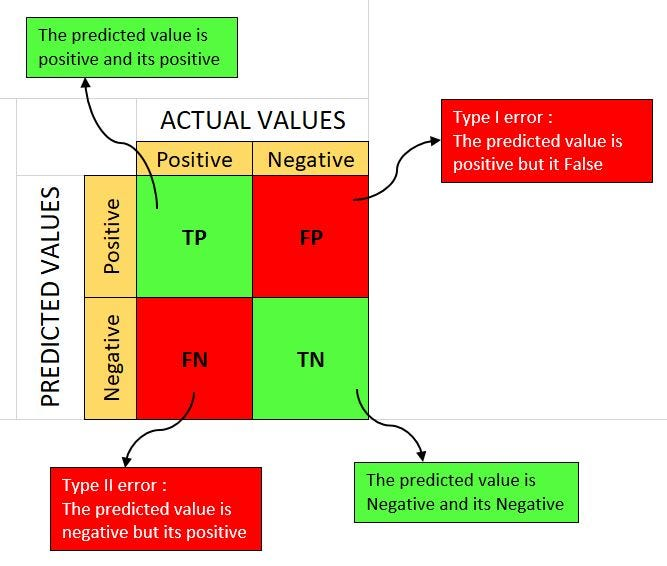

Using the values from the confusion matrix, several evaluation metrics can be derived, including:

- Accuracy: (TP + TN) / (TP + TN + FP + FN) (why is this problematic??)  Highly imbalanced data

- False positive rate:  FP/(FP + TN)-  % of negatives misclassified as positive
- False negative rate:  FN/(TP+FN) -  % of positives we misclassified as negative
- Recall (also known as Sensitivity or True Positive Rate): TP / (TP + FN) - % positives classified correctly
- Precision: TP / (TP + FP) - % positive out of those we predicted positive
- Specificity (also known as True Negative Rate): TN / (TN + FP):  % negatives correctly classified as negative


Any one of these metrics is not good on its own.  You could get excellent results for one but poor results for another.  Need to report them in pairs.
- Recall and precision
- F1-Score: 2 * (Precision * Recall) / (Precision + Recall)

#### ROC and AUC
    

- Sensitivity and specificity or (1 - specificity) can be combined into a graph called the receiver operating curve (ROC).  
- Compute sens vs spec for a range of thresholds
- The further from a diagonal line, the better the classifier
- A diagonal line means random guessing:  half are correctly classified and half are not
- The closer to hugging the corner the more true classifications are made


Area under curve (AUC)

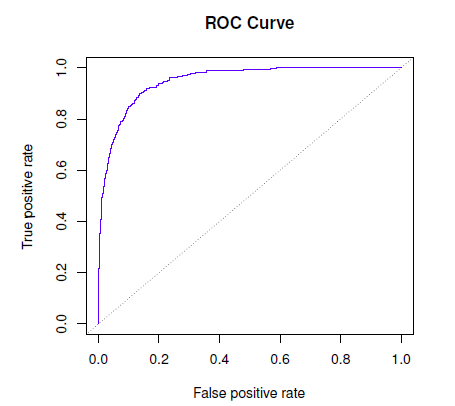

### True Positive Rate (TPR)
- **What it is:** The True Positive Rate tells us how good our model is at correctly identifying the positive cases (the ones we are interested in finding).
- **Intuition:** Imagine you're a doctor looking for a specific disease. TPR is the percentage of sick patients that you correctly diagnose as sick. Higher TPR means you’re catching more of the sick patients.
- **Dummy Example:** If you have 100 patients with the disease, and your model correctly identifies 90 of them, your TPR is 90%. It shows how good your model is at finding the positive cases.

### False Positive Rate (FPR)
- **What it is:** The False Positive Rate tells us how often our model incorrectly labels a negative case as positive.
- **Intuition:** Continuing the doctor example, FPR is the percentage of healthy patients that you wrongly diagnose as sick. Lower FPR means you’re making fewer mistakes with healthy patients.
- **Dummy Example:** If you have 100 healthy patients, and your model incorrectly identifies 20 of them as sick, your FPR is 20%. It shows how often your model falsely alarms healthy cases.

### Why Consider Both?
Imagine you have a security system:
- **TPR:** How good it is at catching actual burglars.
- **FPR:** How often it mistakes innocent people (e.g., your neighbors) for burglars.

If you only looked at TPR, you might set your system to be extremely sensitive, catching all burglars (high TPR) but also falsely accusing a lot of innocent people (high FPR). Conversely, if you only minimized FPR, you might make the system too lenient, letting burglars go undetected.

By plotting both TPR and FPR (like in an ROC curve), you can find a good balance, ensuring your system is effective at catching burglars without too many false alarms. This balance is crucial in many real-world applications, whether it's medical diagnosis, security systems, or spam detection.

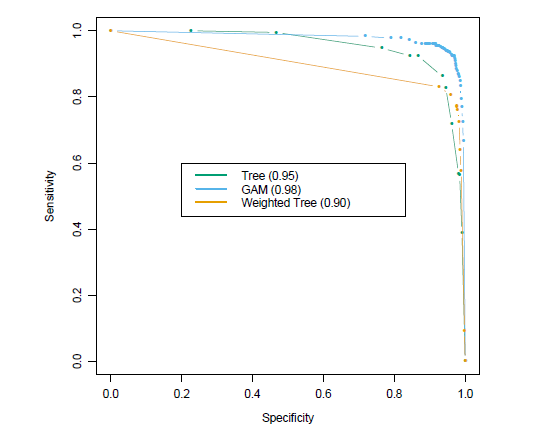

- tps and fps are functions of a threshold (same classifier)
- ROC is when we vary the threshold and compute TPR and FPR

Consider a logistic regression model with a varying threshold.  The metrics will vary because we will get varying TPs, TNs etc.

Once we have trained a model (log reg) on training data, we will compute (for a given threshold), the confusion matrix.  We then vary the threshold and recompute; do this over and over from threshold min to max.  This gives us the ROC.

Then we compute the Area Under the Curve (AUC).  
- The higher the value the better the classifier. 
- A high AUC value indicates one that is good at achieving high TP rates while maintaining low FP rates. 
- A poor classifier is one that has a 45deg line.  This classifier randomly classifies instances. TPR roughly equals FPR.  The classifier is predicting not better than random chance.  


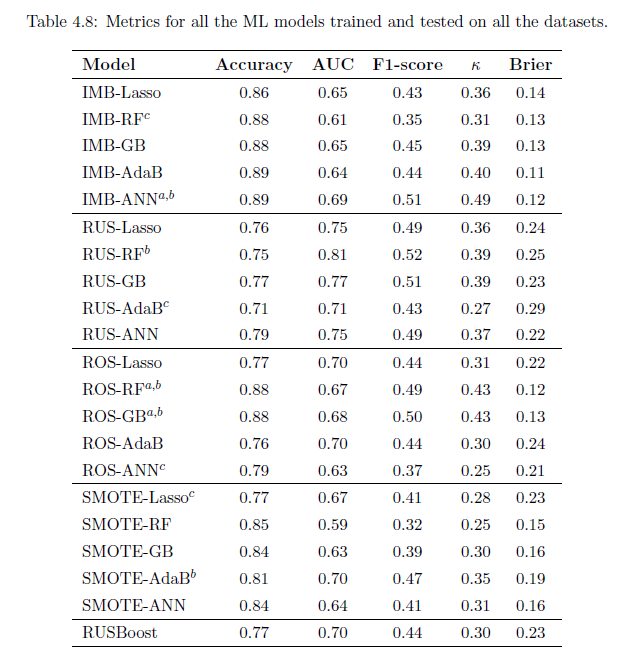

In [68]:
X_train2.shape

(26048, 66)

In [69]:
from sklearn.metrics import accuracy_score

# train models
LR.fit(X_train2,y_train2)
RFC.fit(X_train2,y_train2)
GBC.fit(X_train2, y_train2)

#predict using test data
LR_pred = LR.predict(X_test2)
RFC_pred = RFC.predict(X_test2)
GBC_pred = GBC.predict(X_test2)

# compute accuracy metric
accuracy1 = accuracy_score(y_test2, LR_pred)
accuracy2 = accuracy_score(y_test2, RFC_pred)
accuracy3 = accuracy_score(y_test2, GBC_pred)



print(accuracy1)
print(accuracy2)
print(accuracy3)

C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a0025105\AppData\Local\Temp\ipykernel_5300\257482852.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

0.8556732688469215
0.8564409642253954
0.8671886995240289


### AUC and ROC 

In [70]:
# compute accuracy metric

from sklearn.metrics import roc_auc_score

# Assuming LR_pred contains predicted probabilities or decision function scores
AUC1 = roc_auc_score(y_test2, LR_pred)
AUC2 = roc_auc_score(y_test2, RFC_pred)
AUC3 = roc_auc_score(y_test2, GBC_pred)

print(AUC1)
print(AUC2)
print(AUC3)

0.7751663708961846
0.7791561771321268
0.7834030844390335


### Evaluation metrics:  regression

Reminder:  TV vs sales data

In [71]:
knn_reg.fit(X_r,y_r)


KNeighborsRegressor(n_neighbors=1)

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#mean_squared_error(ytest,ypred)
mean_squared_error(y_r,y_r)

# these values on their own are meaningless
# you must compare them with other models

#why is the error zero?

0.0

# Training and Testing (validation)

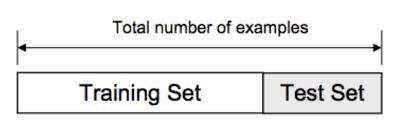

generalizability- how well can the model perform on new, unseen data?
overfitting the training data

- test to see how well it generalizes
- tune the model by varying HPs

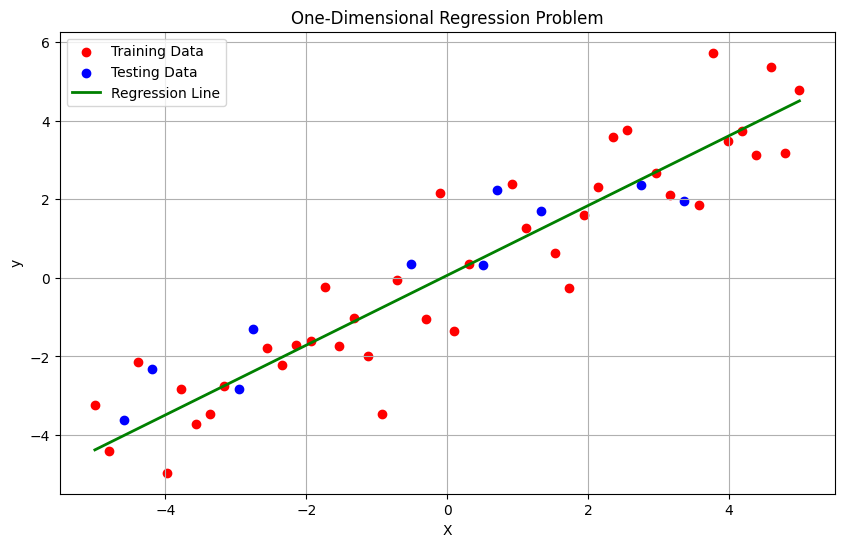

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(0)
X = np.linspace(-5, 5, 50).reshape(-1, 1)  # One-dimensional input (X)
y = X + np.random.normal(0, 1, size=X.shape)  # Linear relationship with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='red', label='Training Data')

# Plot testing data
plt.scatter(X_test, y_test, color='blue', label='Testing Data')

# Plot regression line
plt.plot(X, model.predict(X), color='green', linewidth=2, label='Regression Line')

plt.title('One-Dimensional Regression Problem')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [106]:
## Train/test

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc

#X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_enc, 
                                                   # test_size = 0.5)
# 20% of your dataset randomly and assign it to a test set

#train our models on the training set
LR.fit(X_train2,y_train2)
RFC.fit(X_train2,y_train2)
GBC.fit(X_train2, y_train2)
KNC.fit(X_train2,y_train2)


#test our models by feeding in xtest to get ypred
LR_pred = LR.predict(X_test2)
RFC_pred = RFC.predict(X_test2)
GBC_pred = GBC.predict(X_test2)
KNC_pred = GBC.predict(X_test2)

# test data is called ground truth
accuracy1 = accuracy_score(y_test2, LR_pred)
accuracy2 = accuracy_score(y_test2, RFC_pred)
accuracy3 = accuracy_score(y_test2, GBC_pred)
accuracy4 = accuracy_score(y_test2, KNC_pred)


C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a0025105\AppData\Local\Temp\ipykernel_26644\770390046.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [107]:
print("Log reg accuracy:",accuracy1)
print("RFC accuracy:", accuracy2)
print("GBC accuracy:",accuracy3)
print("KNC accuracy:", accuracy4)

Log reg accuracy: 0.8556732688469215
RFC accuracy: 0.8582834331337326
GBC accuracy: 0.8671886995240289
KNC accuracy: 0.8671886995240289


See how it varies; rerun

In [108]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, LR_pred)

auc1 = roc_auc_score(y_test, LR_pred)
auc2 = roc_auc_score(y_test, RFC_pred)
auc3 = roc_auc_score(y_test, GBC_pred)
auc4 = roc_auc_score(y_test, KNC_pred)

print("Log reg auc:",auc1)
print("RFC auc:", auc2)
print("GBC auc:",auc3)
print("KNC auc:", auc4)

Log reg auc: 0.7751663708961846
RFC auc: 0.7842892996430119
GBC auc: 0.7834030844390335
KNC auc: 0.7834030844390335


### k-fold Cross Validation

Testing and validation is to see how well the model performs on unseen data (although it is still within the same distribution)

Instead of only splitting the data once, we can split it k times into k-folds.  We then train on the k-1 and test on the remaining set.  We go through all k-1 sets until we have trained and tested on all the data. 

K-fold cross-validation (CV) is often preferred over a simple train/test split for several reasons:

1. Better Utilization of Data: K-fold CV allows for better utilization of the available data. With train/test split, a portion of the data is used only for testing, which means less data is available for training the model. In k-fold CV, every data point is used for both training and testing, ensuring that the model is exposed to as much data as possible.

2. Robustness of Performance Evaluation: K-fold CV provides a more robust estimate of model performance compared to a single train/test split. By averaging the performance across multiple folds, it reduces the variability that can occur with a single split. This helps in obtaining a more reliable estimate of how well the model is expected to perform on unseen data.

3. Detection of Overfitting: K-fold CV helps in detecting overfitting. If a model performs significantly better on the training set compared to the test set across multiple folds, it suggests that the model may be overfitting the training data. This can help in identifying the need for regularization or other techniques to improve generalization.

4. Parameter Tuning: K-fold CV is commonly used for parameter tuning. By performing CV with different parameter settings, one can compare the performance of the model across different configurations and select the one that yields the best results. This helps in finding the optimal hyperparameters for the model.

5. Data Imbalance: K-fold CV can be particularly useful in situations where the dataset has imbalanced classes. It ensures that each fold has a representative distribution of the classes, reducing the chances of biased performance evaluation.

Overall, k-fold CV provides a more robust and reliable assessment of model performance, helps in parameter tuning, and allows for better utilization of the available data, making it a preferred choice in many machine learning tasks.

train test split -  80% training, 20% test.  This would be great if the dataset was very large.  
However, when we have smaller datasets, we may consider k fold cv

### k-fold Cross Validation

when k =n, that is called leave one out cross validation (LOOCV)

Instead of only splitting the data once, we can split it k times into k-folds.  We then train on the k-1 and test on the remaining set.  We go through all k-1 sets until we have trained and tested on all the data. 



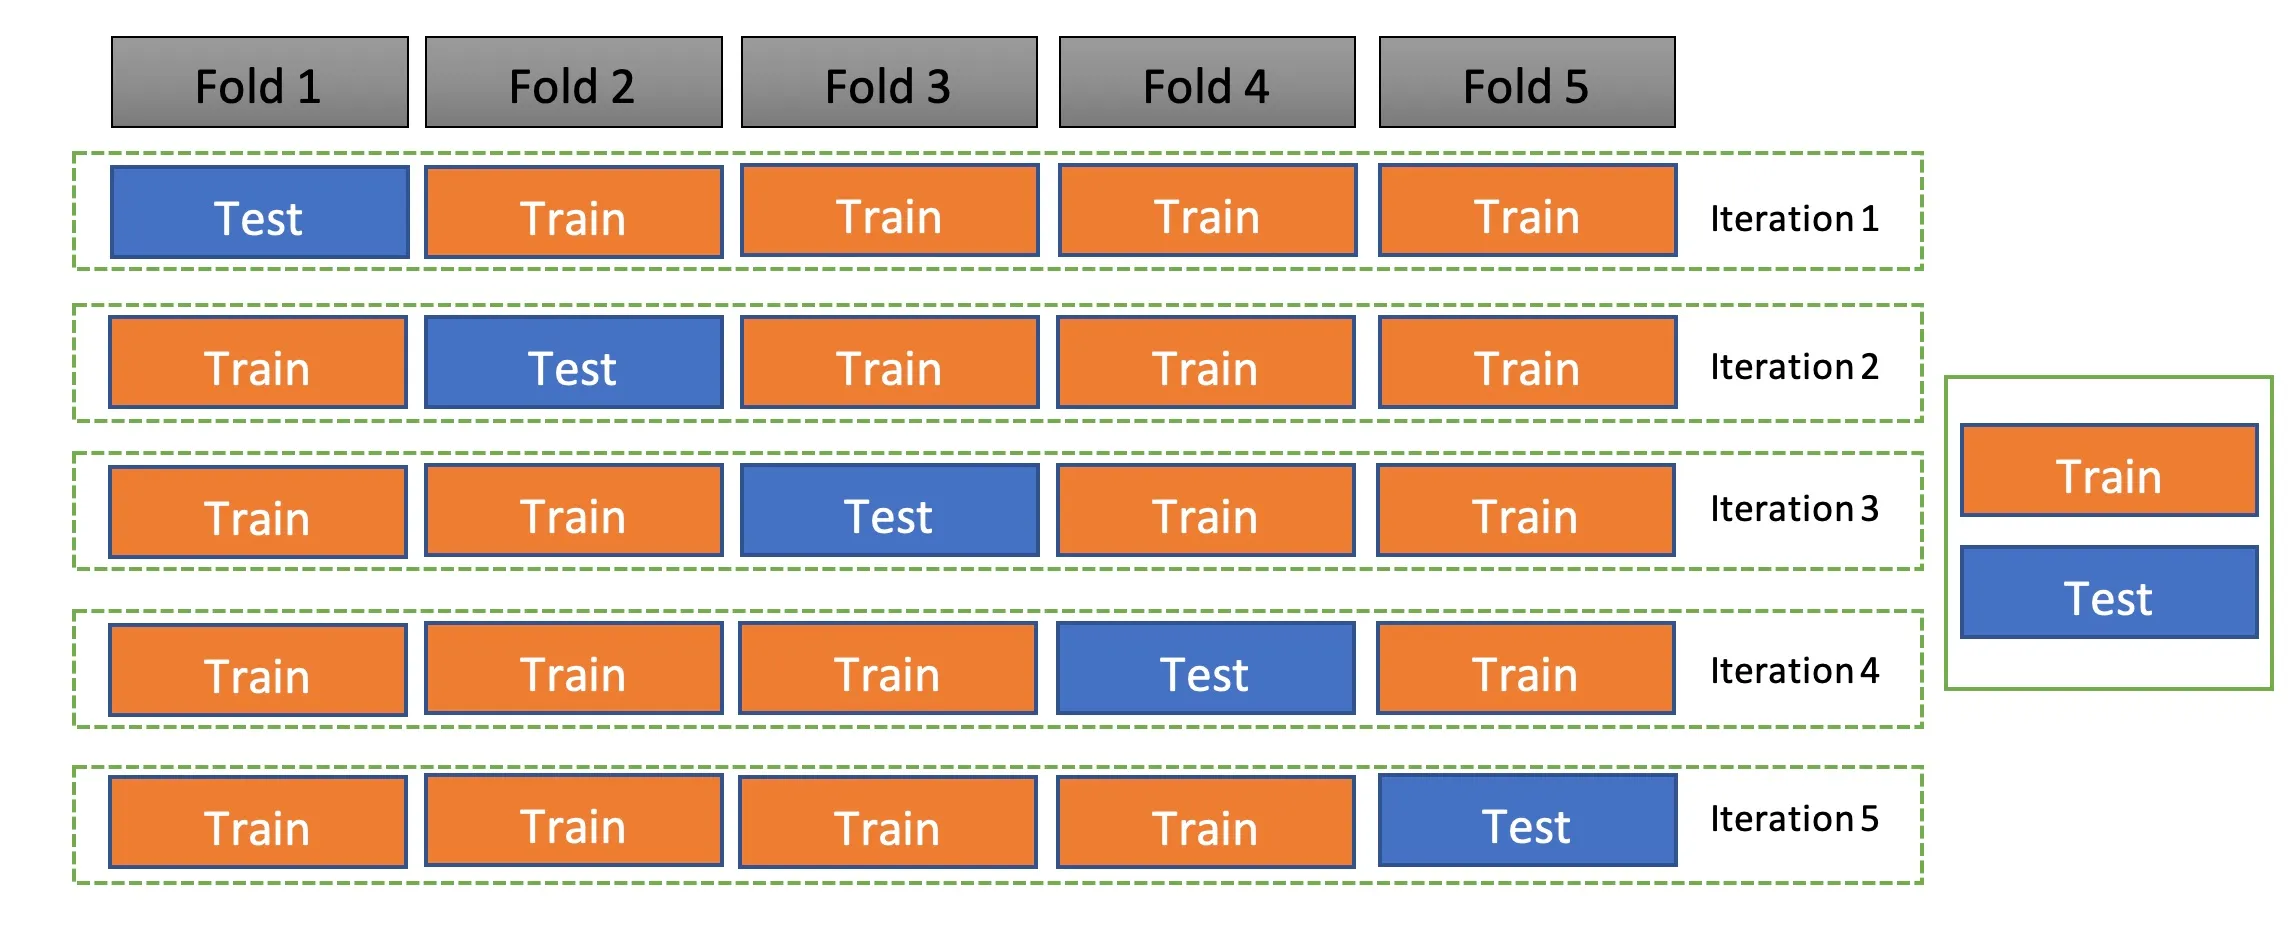

K-fold cross-validation (CV) is often preferred over a simple train/test split for several reasons:

1. Better Utilization of Data: K-fold CV allows for better utilization of the available data. With train/test split, a portion of the data is used only for testing, which means less data is available for training the model. In k-fold CV, every data point is used for both training and testing, ensuring that the model is exposed to as much data as possible.

2. Robustness of Performance Evaluation: K-fold CV provides a more robust estimate of model performance compared to a single train/test split. By averaging the performance across multiple folds, it reduces the variability that can occur with a single split. This helps in obtaining a more reliable estimate of how well the model is expected to perform on unseen data.

3. Detection of Overfitting: K-fold CV helps in detecting overfitting. If a model performs significantly better on the training set compared to the test set across multiple folds, it suggests that the model may be overfitting the training data. This can help in identifying the need for regularization or other techniques to improve generalization.

4. Parameter Tuning: K-fold CV is commonly used for parameter tuning. By performing CV with different parameter settings, one can compare the performance of the model across different configurations and select the one that yields the best results. This helps in finding the optimal hyperparameters for the model.

5. Data Imbalance: K-fold CV can be particularly useful in situations where the dataset has imbalanced classes. It ensures that each fold has a representative distribution of the classes, reducing the chances of biased performance evaluation.

Overall, k-fold CV provides a more robust and reliable assessment of model performance, helps in parameter tuning, and allows for better utilization of the available data, making it a preferred choice in many machine learning tasks.

1. compare models; how well they perform on the data
2. tune the models by varying the HPs

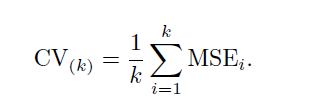

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

scores = cross_val_score(GBC, X_train2, y_train2, cv=5, scoring=make_scorer(roc_auc_score))
scores
print("%0.2f AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversio

0.78 accuracy with a standard deviation of 0.01


In [94]:
scores
print("%0.2f AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 AUC with a standard deviation of 0.01


In [93]:
scores

array([0.76939071, 0.77383059, 0.78886275, 0.76777775, 0.7810913 ])

In [95]:
scores = cross_val_score(LR, X_train2, y_train2, cv=5, scoring=make_scorer(roc_auc_score))
scores
print("%0.2f AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was

0.76 accuracy with a standard deviation of 0.01


C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
scores

array([0.7575876 , 0.75810085, 0.77930453, 0.75355999, 0.76060092])

### what can we do to prevent data leakage when applying kfold CV?
- pipeline
- kfold on 80% and test on 20%
- https://machinelearningmastery.com/data-preparation-without-data-leakage/

## Overfitting/underfitting
If we want a model that is good on predicting new data, then we need a holdout test dataset and compare different models.

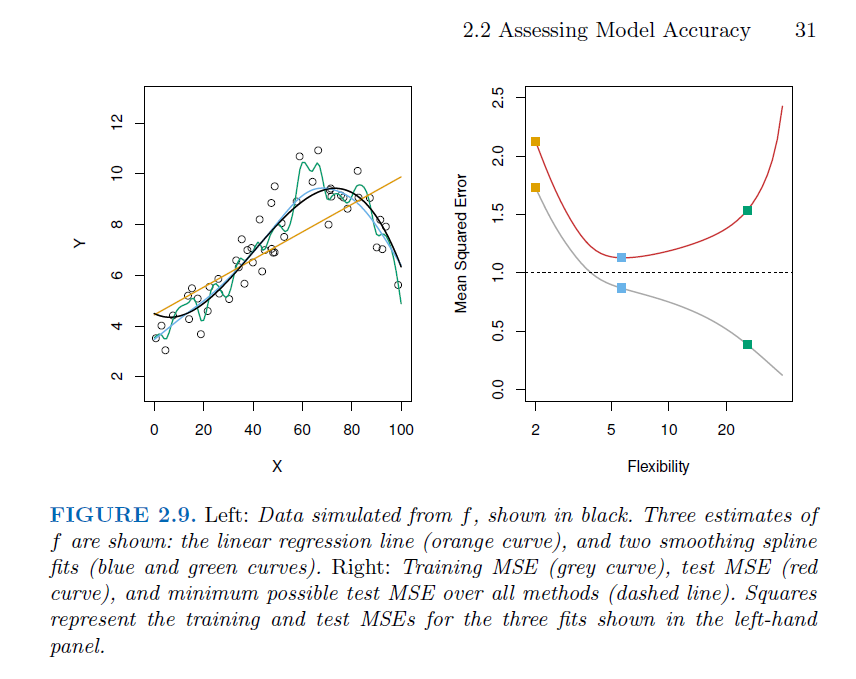

### Bias-variance tradeoff (distinguishes children from adults ~ Kilian Weinberger)

Here's how the tradeoff typically works:

Low Bias, High Variance: A complex model with low bias tends to have high variance. It can capture the intricacies and nuances of the training data very well, often resulting in a high accuracy on the training set. However, due to its sensitivity to training data fluctuations, it may struggle to generalize to new, unseen data. This leads to high variability in its predictions, resulting in high variance on the test set.

High Bias, Low Variance: On the other hand, a simple model with high bias tends to have low variance. It may make strong assumptions or simplifications, resulting in underfitting the training data. It may not capture the underlying patterns effectively, leading to high error on the training set. However, due to its simplicity, it tends to be more stable and less sensitive to training data fluctuations, resulting in lower variance on the test set.

The goal is to strike a balance between bias and variance to achieve the best model performance. This can be achieved by selecting an appropriate model complexity, applying regularization techniques, increasing the training data size, or using ensemble methods that combine multiple models.

The bias-variance tradeoff reminds us that there is a tradeoff between model complexity and generalization performance. A model that is too simple may have high bias but low variance, while a model that is too complex may have low bias but high variance. Finding the right balance is crucial to building a model that performs well on both the training and test sets.








**Overfitting** occurs when a model has low bias on the training set but high variance on the test set. It is a result of the model being too complex and excessively fitting the training data, to the point that it starts **memorizing noise** or random fluctuations in the data.

In an overfitting scenario:

- Low Bias: The model can capture the patterns and details of the training data very well, resulting in low bias. It can fit the training data closely and achieve high accuracy on it.

- High Variance: However, due to its high complexity and sensitivity to training data fluctuations, the overfit model fails to generalize effectively to new, unseen data. It becomes overly sensitive to the specific examples in the training set, making predictions that do not generalize well to different data points. This results in high variance, as the model's performance on the test set tends to be worse than on the training set.

In other words, the overfit model "over-adapts" to the noise or idiosyncrasies of the training data, which leads to poor generalization to unseen data.

To address overfitting, techniques like regularization, cross-validation, early stopping, or reducing model complexity can be applied. These methods aim to strike a better balance between bias and variance, ultimately improving the model's ability to generalize and reducing its tendency to overfit the training data.

Underfitting occurs when a model has high bias on the training set and low variance on the test set. It happens when the model is too simple and fails to capture the underlying patterns in the data.

In an underfitting scenario:

- High Bias: The model's simplicity and limited capacity prevent it from capturing the complexity of the underlying patterns in the training data. As a result, it has high bias and struggles to fit the training data well. It makes strong assumptions or simplifications that are not representative of the true relationship between the features and the target variable.

- Low Variance: However, due to its simplicity, the underfit model tends to be more stable and less sensitive to training data fluctuations. It does not overly rely on specific examples or noise in the training set, resulting in low variance. Despite its poor fit to the training data, its performance on the test set may not vary significantly.

In summary, an underfit model has limited capacity and fails to capture the complexity of the underlying data. It exhibits high bias, as it underestimates or oversimplifies the relationship between the features and the target variable. However, it has low variance as it does not overly fit the training data.

To address underfitting, one can consider increasing the model's complexity, adding more relevant features, or using more advanced algorithms to allow the model to better capture the patterns and improve its performance on both the training and test sets.

how to reduce overfitting:  regularization; rf (prune); neural nets (drop out)

Random Forest example

# Hyperparameter tuning

Models have tuning variables that we can call hyperparameters. We want to train models on different combinations of these parameters and find the best model.






1. **Random Forests**:
   - `n_estimators`: Number of decision trees in the forest.
   - `max_depth`: Maximum depth of each decision tree.
   - `min_samples_split`: Minimum number of samples required to split an internal node.
   - `max_features`: Number of features to consider when looking for the best split.

2. **Support Vector Machines (SVM)**:
   - `C`: Penalty parameter for the error term.
   - `kernel`: Type of kernel function to be used (e.g., linear, polynomial, radial basis function).
   - `gamma`: Kernel coefficient for certain kernel functions.
   - `degree`: Degree of the polynomial kernel function.

3. **Gradient Boosting Machines (GBM)**:
   - `n_estimators`: Number of boosting stages.
   - `learning_rate`: Shrinkage parameter that controls the contribution of each tree.
   - `max_depth`: Maximum depth of each individual tree.
   - `subsample`: Fraction of samples used for fitting each tree.

4. **Neural Networks**:
   - `hidden_layers`: Number of hidden layers in the neural network.
   - `hidden_units`: Number of units/neurons in each hidden layer.
   - `activation`: Activation function used in each neuron (e.g., relu, sigmoid, tanh).
   - `learning_rate`: Step size at each iteration during gradient descent.

5. **K-Nearest Neighbors (KNN)**:
   - `n_neighbors`: Number of neighbors to consider for classification/regression.
   - `weights`: Weight function used in prediction (e.g., uniform, distance).
   - `p`: Parameter for the Minkowski distance metric.
   - `leaf_size`: Leaf size passed to the BallTree or KDTree.

These examples highlight some commonly used hyperparameters, but it's worth noting that each machine learning model may have additional hyperparameters specific to its algorithm. The selection and tuning of hyperparameters play a crucial role in optimizing the performance of machine learning models for a given problem.

In [111]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


### GridSearch vs randomized search cross-validation

In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### random forest hp tuning example

In [83]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, None],
    'max_features': ["sqrt", "log2", None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [10, 25, 50, 75, 100]
}


In [ ]:
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, cv = 5, verbose =2, scoring='roc_auc',  n_jobs = -1)
grid_search.fit(X_train2, y_train2)

In [ ]:
iter1 = cv error
iter2 = cv error 2
..
iter1000 = cv error 1000

compare all the errors; choose the HP combination with the lowest error.



In [100]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC = RFC()

In [98]:
rand_search = RandomizedSearchCV(RFC, 
                                 param_distributions = param_grid, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train2, y_train2)

C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\a0025105\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\a0025105\AppData\Local

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [10, 25, 50, 75, 100]})

In [99]:
rand_search.best_params_

{'n_estimators': 75,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

Paper by Bergstra and Bengio

https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [ ]:
rfc_final = RFC(n_estimators=75, max_depth = 100, max_features = "sqrt")

ENTIRE DATASET


- import (adult)
- split into x and y
- split into train/test
- EDA, cleaning
- Supervised learning models (lin reg, log reg, knn, dt/rf)
- Evaluating models (train/test, kfold cv, overfitting, bias/variance)
- Tuning the hyperparameters

### Imbalanced data
In classification problems, there is a tendency to have imbalance in the data.  That is, one class occurs more than the other class.  There is therefore a tendency for the algorithm to predict the majority class more than the minority. 



1. Bias towards the Majority Class: The model tends to be biased towards predicting the majority class since it has more instances to learn from. As a result, the minority class may be consistently misclassified or completely ignored.

2. Poor Generalization: Imbalanced data can lead to poor generalization performance of the model. The model may struggle to learn the patterns and characteristics of the minority class due to limited representation, leading to low recall or sensitivity on the minority class.

3. Misleading Evaluation Metrics: Standard evaluation metrics, such as accuracy, can be misleading in imbalanced datasets. A model that always predicts the majority class can have a high accuracy, but it fails to capture the minority class, which might be more important in the context of the problem.

4. Loss of Information: Imbalanced data may result in the loss of important information related to the minority class, reducing the model's ability to make accurate predictions for that class.

5. Overfitting: Imbalanced data can increase the risk of overfitting, particularly when using algorithms that are sensitive to imbalanced distributions. The model might memorize the majority class instances, leading to poor generalization on unseen data.

6. Model Instability: The performance of a model trained on imbalanced data can be unstable and inconsistent across different runs or subsets of the data. The model's behavior may heavily rely on the specific instances present in the training set.

To overcome these dangers and challenges, addressing class imbalance becomes crucial. Applying appropriate rebalancing techniques, such as resampling the dataset or adjusting class weights, can help improve the model's ability to handle imbalanced data and give fair consideration to the minority class during training. Additionally, selecting appropriate evaluation metrics that focus on the minority class, such as precision, recall, or F1-score, can provide a more accurate assessment of the model's performance.

When dealing with imbalance in a classification dataset, the level of imbalance that requires using methods to rebalance the dataset depends on several factors, including the specific problem, the algorithm being used, and the desired outcome. There is no universally defined threshold for when to apply rebalancing techniques, as it varies case by case. However, here are some general guidelines:

1. Moderate Imbalance:
   - In cases where the class imbalance is moderate, where the minority class represents around 20% to 40% of the dataset, you can try using the algorithm directly without rebalancing.
   - Some algorithms, such as Random Forests and Gradient Boosting Machines, can handle moderate class imbalance to some extent due to their internal mechanisms.

2. Severe Imbalance:
   - When the class imbalance is severe, with the minority class representing less than 20% of the dataset, rebalancing techniques are often necessary.
   - This is especially important when the minority class is crucial and misclassifications have significant consequences.

3. Evaluation Metrics and Business Context:
   - Consider the evaluation metrics you are using and the business context of the problem.
   - If the evaluation metric is heavily affected by the imbalance, such as accuracy in imbalanced datasets, rebalancing can be useful to improve performance.
   - Additionally, the business context may guide your decision. If correctly identifying the minority class is of utmost importance, rebalancing techniques may be necessary.

Common rebalancing techniques include:
- Random undersampling: Reducing the size of the majority class by randomly removing instances.
- Random oversampling: Increasing the size of the minority class by randomly duplicating instances or generating synthetic samples.
- SMOTE (Synthetic Minority Over-sampling Technique): Creating synthetic samples for the minority class by interpolating between existing samples.
- Class-weighting: Assigning higher weights to the minority class during training to give it more importance.

It's important to note that rebalancing techniques should be applied cautiously and with consideration for the potential impact on the model's performance. It's recommended to experiment with different techniques and evaluate their effectiveness using appropriate evaluation metrics and cross-validation techniques to ensure reliable results.